# Image Datasets

In this notebook we are going to explore how we can load images using PyTorch and transform them into a tensor representation so that they can be used with neural networks.

In [1]:
import os

The images we are using in this notebook are stored in the directory `data/image_datasets/leaves`. This folder contains images of to different kinds of leaves. For each category there is a subfolder in this directory containing all the images of that category.

In the following cell we will collect some information about the images.

In [2]:
# This is the directroy where our images are stored
image_dir = "data/image_datasets/leaves"

# For each image category there is a separate folder in image the directory
# We will collect some information about the categories here
categories = list(map(lambda x : {"name": x, "dir": x}, os.listdir(image_dir)))
n_categories = len(categories)

# In this variable we will store the subdirectories of the image directory that contain the images
# of one category
category_dirs = []

for i, category in enumerate(categories):
    category_dirs.append(os.path.join(image_dir, category["dir"]))

# Print some information about the images
print('The dataset contains:')
for i, category in enumerate(categories):
    print('\u2022 {}: {:,} images'.format(category["name"], len(os.listdir(category_dirs[i]))))

The dataset contains:
• leaf1: 4 images
• leaf2: 4 images


## Building a dataset with PyTorch

Now we need to build a dataset with PyTorch's Dataset class. There is a special dataset class named *ImageFolder* in PyTorch that already provides functionality for loading images from a folder. It expects each image category to have its own subfolder like it is the case for the leaf images.

When loading images we also need to perform some operations on them. Images are usualy stored as JPG or PNG files on our disks. However for training neural networks they must be converted into a bitmap format and then into a PyTorch tensor. Also all images must have the same size, because neural networks usually have a fixed size of neurons and cannot handle images of different shapes. Finally all images need to have the same number format which is usually a 32 bit floating point format. If you are interested in what this format is you can read more about it <a href="https://en.wikipedia.org/wiki/Floating-point_arithmetic" target="_blank">here</a>

You can also have a look at the documentation of ImageFolder and transformations:
- ImageFolder datasets:
https://pytorch.org/vision/stable/generated/torchvision.datasets.ImageFolder.html
- Transforming Images:
https://pytorch.org/vision/stable/transforms.html

Let's start implementing a PyTorch image dataset.

First we import all the necessary modules.

In [3]:
import torch
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder
from torchvision.transforms import v2

C:\Users\tilof\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\datapoints\__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
C:\Users\tilof\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\transforms\v2\__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedba

Next we build a transformation pipeline which resizes the images to a shape of 224x224 pixels which most classification networks are trained with. Then it transforms the images into a 32 bit floating point tensor.

In [4]:
# When loading images we can send them through a pipeline that performs some transformations on them
transform = v2.Compose([
    v2.Resize(size=(224, 224)),
    v2.ToTensor(),
    v2.ToDtype(torch.float32),
])

C:\Users\tilof\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\transforms\v2\_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `transforms.Compose([transforms.ToImageTensor(), transforms.ConvertImageDtype()])`.
  warnings.warn(


We can now use the ImageFolder class of PyTorch to build our image dataset. It gets the location of our image folder and the transformation pipeline as an argument. Note that you don't need to define the number and the names of the available categories. PyTorch uses the subdirectories in your image dataset directory to find out these values.

In [5]:
# Create an instance of the dataset
dataset = ImageFolder(image_dir, transform=transform)

Now that we have defined the dataset we can explore the first image of it. You can handle the dataset class like an array, but you will get a tuple back. The first value of the tuple is the image, the second value the corresponding label. The labels are the numerical indices of our image categories. As we have two categories in out dataset there are two possible labels: `0` and `1`.

The image tensor we get from our dataset has three dimensions. The first dimension represents the color channels of our image. Usually images are encoded using the RGB (red, green, blue) schema, so they have three color channels. The second and third dimension represent the width and height of the image.

When we look at the tensor itself we will see that every pixel of every color channel is represented by a floating point number. As each number has 32 bit (which is equal to 4 bytes) and our tensor has 3\*224\*224=150528 numbers each image will consume 3\*224\*224\*4=602 kB of memory when represented as a tensor. This is much more as they need when stored as JPG or PNG files on disk, because these formats compress the images by a lot.

In [6]:
# This is how the loaded batch looks now in raw format
image, label = dataset[0]
print("Label", label)
print("Image shape", image.shape)
print("Image", image)

Label 0
Image shape torch.Size([3, 224, 224])
Image tensor([[[0.4667, 0.5137, 0.4667,  ..., 0.4157, 0.4078, 0.3569],
         [0.6039, 0.5961, 0.4980,  ..., 0.4980, 0.3647, 0.4431],
         [0.4471, 0.6353, 0.6941,  ..., 0.4549, 0.3843, 0.4549],
         ...,
         [0.6157, 0.4784, 0.5098,  ..., 0.4980, 0.5608, 0.5725],
         [0.8275, 0.6039, 0.4627,  ..., 0.3569, 0.4275, 0.6039],
         [0.7529, 0.6980, 0.5882,  ..., 0.4980, 0.4471, 0.5569]],

        [[0.4667, 0.5020, 0.4471,  ..., 0.4157, 0.4039, 0.3529],
         [0.6039, 0.5804, 0.4784,  ..., 0.4941, 0.3608, 0.4392],
         [0.4510, 0.6235, 0.6706,  ..., 0.4549, 0.3804, 0.4510],
         ...,
         [0.5961, 0.4549, 0.4784,  ..., 0.5059, 0.5686, 0.5765],
         [0.8078, 0.5804, 0.4431,  ..., 0.3647, 0.4353, 0.6078],
         [0.7333, 0.6706, 0.5608,  ..., 0.5059, 0.4549, 0.5608]],

        [[0.4471, 0.4863, 0.4353,  ..., 0.4353, 0.4235, 0.3725],
         [0.5843, 0.5686, 0.4667,  ..., 0.5137, 0.3804, 0.4588],
      

We can have a look at the image tensor using matplotlib's imshow function. But we need to reformat the tensor for that. First matplotlib expects the color dimension to be represented by the third dimension of a tensor, but PyTorch uses the first dimension for the color channels. We can fix that using the `permute` method of PyTorch. Next matplotlib uses NumPy tensors instead of PyTorch tensors. So we have to convert the tensors to the NumPy format which can be done using the `numpy()`method of PyTorch tensors. Sometimes we also train models on a GPU, but matplotlib can only access CPU memory. This is why we need to call the `cpu()` method of the PyTorch tensor, which will create a copy of the original tensor in the CPU memory. 

Documentation:
- `cpu()` https://pytorch.org/docs/stable/generated/torch.Tensor.cpu.html
- `numpy()` https://pytorch.org/docs/stable/generated/torch.Tensor.numpy.html
- `permute()` https://pytorch.org/docs/stable/generated/torch.permute.html#torch.permute

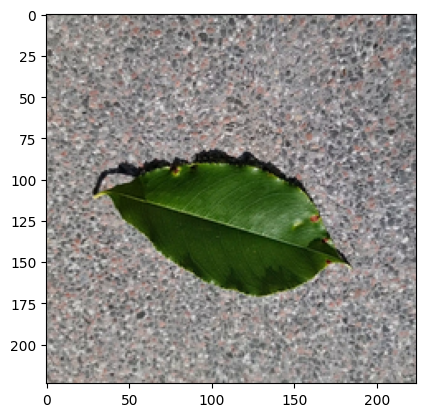

In [7]:
# Let's show the image using matplotlib
plt.imshow(image.permute(1,2,0).cpu().numpy())

## Image transformations

Neural networks have big problems when the datasets contain similar looking images. Also having too less images can be a huge problem when training a network on image classification. This is why image augmentation is used when loading the images. Aumenting images means performing operations like scaling or rotation on images so that they look different every time they are loaded. 

##### Your task:

In the following cells you should build a pipeline that performs the following operations on the images:
- Flip the images horizontally with a probability of 50%
- Flip the images vertically with a probability of 50%
- Perform an affine transformation (= scaling + rotation)
- Perform a zoom out operation on the images
- Finally resize them to the same shape of 224x224 pixels

You can have a look on the illustration of image transformations here:

https://pytorch.org/vision/stable/auto_examples/transforms/plot_transforms_illustrations.html#sphx-glr-auto-examples-transforms-plot-transforms-illustrations-py

In [8]:
# When loading images we can send them through a pipeline that performs some transformations on them
transform = v2.Compose([
    v2.RandomHorizontalFlip(0.5),
    v2.RandomVerticalFlip(0.5),
    v2.RandomAffine(degrees=10),
    v2.RandomZoomOut(),
    v2.Resize(size=(224, 224)),
    v2.ToTensor(),
    v2.ToDtype(torch.float32),
])

Now execute the following cell multiple times. You will see that the image looks different every time you execute this cell. The position of the leaf and the zooming factor changes every time. This will help the neural network prevent from focusing on one area of the image only.

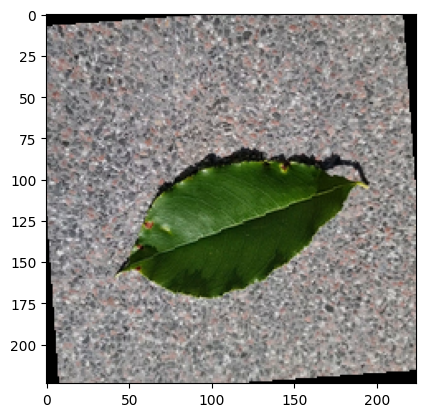

In [9]:
# Create an instance of the dataset
dataset = ImageFolder(image_dir, transform=transform)

# Load the first image and its label
image, label = dataset[0]

# Show the image using matplotlib
plt.imshow(image.permute(1,2,0).cpu().numpy())

## Build a data loader

Now that we have built the dataset we can now build a data loader. A data loader loads multiple images at once and builds a single 4D tensor containing all the images. This tensor is also called a ***batch***. The ***batch size*** defines how many images are loaded at once. We need to split our dataset into batches because when training a neural network we often have not enough memory to load all images at once.

In [10]:
from torch.utils.data import DataLoader

In [11]:
# Create a data loader from our dataset.
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [12]:
# Load a batch of images and labels
images, labels = next(iter(dataloader))

Let's have a look at the shape of the image tensor. It actually is a 4D tensor where the first dimensions is the batch site, the second dimension are the color channels of the images and the third and fourth dimension are the width and height of the images.

In [13]:
# Let's look at the shape of the image tensor
images.shape

torch.Size([2, 3, 224, 224])

Now again let's show both images of the batch that was loaded. You will see that the dataloader sometimes loads images from the first image category and sometimes from the second one. Also both categories can appear in the same batch. Execute the cell below mutiple times to see that the dataloader generates random batches.

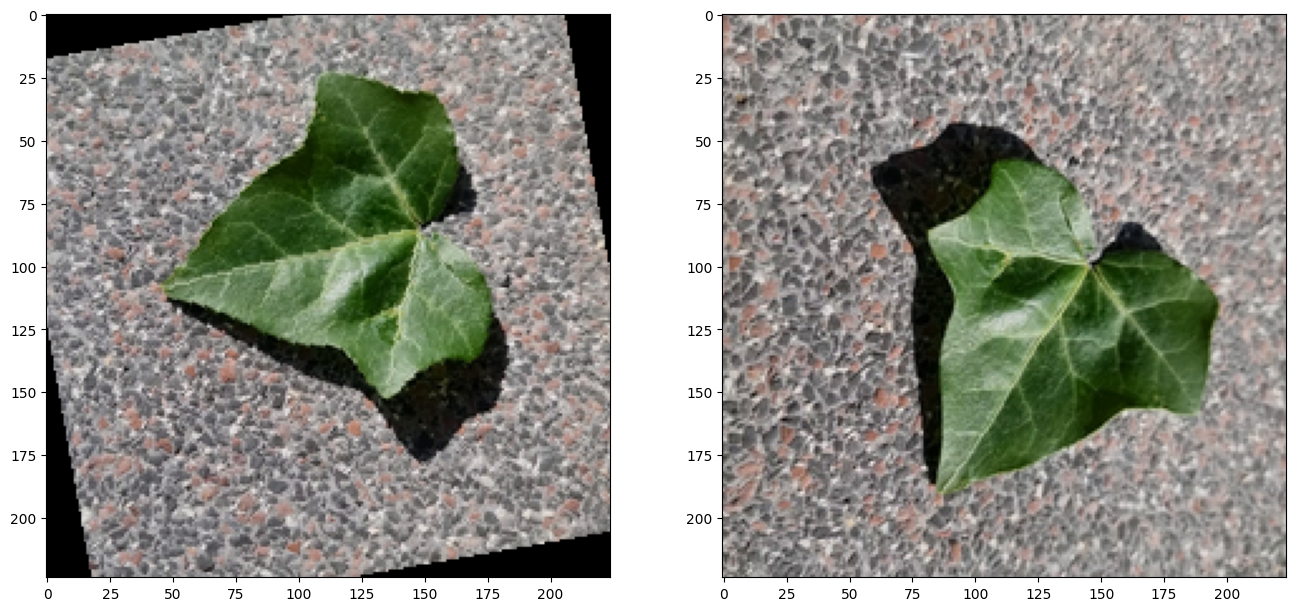

In [14]:
images, labels = next(iter(dataloader))

fix, ax = plt.subplots(1, 2, figsize=(16,8))
ax[0].imshow(images[0].permute(1,2,0).cpu().numpy())
ax[1].imshow(images[1].permute(1,2,0).cpu().numpy())